<a href="https://colab.research.google.com/github/2022M3T1/Projeto4/blob/main/notebooks/colab_Hiperpar%C3%A2metros_de_atritado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ambientação do notebook

In [ ]:
!pip install -U -q PyDrive

In [ ]:
# Importação de bibliotecas. 
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import LabelBinarizer
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif

In [ ]:
#autenticação email inteli
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#dowload base de dados
downloaded = drive.CreateFile({'id': '1-C4iOW6z7oAtWCHhwuC-IeTxp8COwbxj'})
downloaded.GetContentFile('client.csv')

In [ ]:
# Dados lidos do arquvio csv
client = pd.read_csv('client.csv')

#Comparação de features em relação ao índice de cliente engajado

In [ ]:
# Aqui nós iremos gerar uma matriz que indica a porcentagem de correlação entre os atributos
matriz_corr = client.corr().style.background_gradient(cmap='coolwarm')
matriz_corr

,Unnamed: 0,vlr_credito,vlr_saldo,num_atend_atrs,vlr_score,num_produtos,num_atend,qtd_oper,qtd_reclm,qtd_restr,vlr_renda,ind_atrito,ind_engaj
Unnamed: 0,1.000000,-0.001449,0.001522,-0.002444,-0.000885,0.002616,-0.000890,-0.000765,-0.004190,0.003100,-0.000362,-0.002664,0.002035
vlr_credito,-0.001449,1.000000,0.280953,0.006309,0.071460,0.096261,0.009918,0.398583,0.019903,0.098304,0.593851,0.011959,0.070471
vlr_saldo,0.001522,0.280953,1.000000,0.000226,0.074541,0.235828,0.002335,0.088389,0.018893,0.007249,0.160302,0.017218,0.170425
num_atend_atrs,-0.002444,0.006309,0.000226,1.000000,0.001361,0.032058,0.531965,0.019272,-0.000354,0.002933,0.006910,0.021113,0.021248
vlr_score,-0.000885,0.071460,0.074541,0.001361,1.000000,0.076976,0.006721,0.094354,0.002783,-0.293389,0.078622,0.004139,0.066338
num_produtos,0.002616,0.096261,0.235828,0.032058,0.076976,1.000000,0.052517,0.399924,0.000552,0.001635,0.071313,0.007039,0.707495
num_atend,-0.000890,0.009918,0.002335,0.531965,0.006721,0.052517,1.000000,0.028077,-0.000586,0.000265,0.014571,0.011490,0.030704
qtd_oper,-0.000765,0.398583,0.088389,0.019272,0.094354,0.399924,0.028077,1.000000,0.008165,0.151486,0.299594,0.005816,0.296881
qtd_reclm,-0.004190,0.019903,0.018893,-0.000354,0.002783,0.000552,-0.000586,0.008165,1.000000,-0.001011,0.017440,0.537171,0.005056
qtd_restr,0.003100,0.098304,0.007249,0.002933,-0.293389,0.001635,0.000265,0.151486,-0.001011,1.000000,0.053812,-0.001945,0.002315


In [ ]:

target_corr = matriz_corr.data.ind_atrito
df_corr = target_corr.abs().sort_values(ascending=False).to_frame().style.background_gradient(cmap='coolwarm')
df_corr

,ind_atrito
ind_atrito,1.000000
qtd_reclm,0.537171
num_atend_atrs,0.021113
vlr_saldo,0.017218
vlr_renda,0.012472
vlr_credito,0.011959
num_atend,0.011490
num_produtos,0.007039
ind_engaj,0.006447
qtd_oper,0.005816


#Cliente atritado

##Undersampling de não atritados

In [ ]:
import pandas as pd
import numpy as np

cliente_atrito = client[client.ind_atrito == 1]
cliente_atrito

,Unnamed: 0,vlr_credito,vlr_saldo,num_atend_atrs,vlr_score,num_produtos,num_atend,qtd_oper,qtd_reclm,qtd_restr,vlr_renda,ind_atrito,ind_engaj
92,5135,0.013596,0.006807,0.0,0.894196,0.034483,0.0,0.083019,1.0,0.000000,0.018892,1.0,1.0
4087,259785,0.011070,0.005048,0.0,0.350471,0.011494,0.0,0.026415,0.0,0.000000,0.003612,1.0,0.0
5715,356685,0.035036,0.007745,0.0,0.308646,0.011494,0.0,0.018868,0.0,0.036697,0.026948,1.0,0.0
5753,361057,0.064191,0.031470,0.0,1.117262,0.022989,0.0,0.052830,1.0,0.000000,0.110432,1.0,1.0
7637,480701,0.052269,0.009075,0.0,0.636275,0.011494,0.0,0.052830,0.0,0.000000,0.111821,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173376,11067489,0.022855,0.006331,0.0,0.489887,0.034483,0.0,0.071698,0.0,0.000000,0.024726,1.0,1.0
176941,11288368,0.008752,0.004898,0.0,0.434121,0.011494,0.0,0.083019,1.0,0.018349,0.011529,1.0,0.0
178649,11400484,0.011876,0.004694,0.0,0.692042,0.011494,0.0,0.060377,0.0,0.000000,0.003195,1.0,0.0
184201,11774201,0.008256,0.008337,0.0,0.768721,0.011494,0.0,0.049057,0.0,0.000000,0.009446,1.0,0.0


In [ ]:
cliente_not_atrito = client[client.ind_atrito == 0]
cliente_not_atrito

,Unnamed: 0,vlr_credito,vlr_saldo,num_atend_atrs,vlr_score,num_produtos,num_atend,qtd_oper,qtd_reclm,qtd_restr,vlr_renda,ind_atrito,ind_engaj
0,0,0.001802,0.001837,0.0,0.489887,0.000000,0.0,0.030189,0.0,0.055046,0.003889,0.0,0.0
1,18,0.000432,0.000086,0.0,-1.685013,0.000000,0.0,0.011321,0.0,0.009174,0.002361,0.0,0.0
2,30,0.002952,0.001706,0.0,-0.290846,0.011494,0.0,0.045283,0.0,0.036697,0.005001,0.0,0.0
3,35,0.000083,0.001889,0.0,0.190142,0.000000,0.0,0.022642,0.0,0.009174,0.011529,0.0,0.0
4,85,0.014023,0.000945,0.0,-0.402379,0.000000,0.0,0.116981,0.0,0.027523,0.011113,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
185875,11886194,0.002807,0.006070,0.0,-0.221138,0.000000,0.0,0.041509,0.0,0.055046,0.002917,0.0,0.0
185876,11886221,0.027062,0.005580,0.0,1.389125,0.068966,0.0,0.116981,0.0,0.000000,0.008057,0.0,1.0
185877,11886229,0.007014,0.028666,0.0,1.082408,0.045977,0.0,0.026415,0.0,0.000000,0.002084,0.0,1.0
185878,11886303,0.000587,0.001349,0.0,-0.667271,0.000000,0.0,0.033962,0.0,0.009174,0.009168,0.0,0.0


In [ ]:
cliente_not_atrito_sample = cliente_not_atrito.sample(frac=.01, random_state=42)
cliente_not_atrito_sample

,Unnamed: 0,vlr_credito,vlr_saldo,num_atend_atrs,vlr_score,num_produtos,num_atend,qtd_oper,qtd_reclm,qtd_restr,vlr_renda,ind_atrito,ind_engaj
153043,9763395,0.000836,0.003676,0.0,-0.151429,0.011494,0.0,0.011321,0.0,0.027523,0.003334,0.0,0.0
116148,7405981,0.111865,0.002720,0.0,0.406237,0.000000,0.0,0.162264,0.0,0.018349,0.181553,0.0,0.0
4832,305548,0.002696,0.000208,0.0,0.155287,0.000000,0.0,0.037736,0.0,0.000000,0.004167,0.0,0.0
129787,8278816,0.000900,0.001012,0.0,-0.207196,0.045977,0.0,0.071698,0.0,0.000000,0.002084,0.0,1.0
104167,6626067,0.041504,0.000405,0.0,3.403696,0.000000,0.0,0.143396,0.0,0.000000,0.011390,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21933,1386558,0.010020,0.010504,0.0,-1.685013,0.091954,0.0,0.116981,0.0,0.100917,0.009029,0.0,1.0
4234,268802,0.001786,0.004035,0.0,1.012700,0.000000,0.0,0.037736,0.0,0.000000,0.009029,0.0,0.0
81646,5173032,0.003785,0.001600,0.0,-1.719867,0.022989,0.0,0.071698,0.0,0.045872,0.002084,0.0,1.0
45289,2845346,0.003228,0.004529,0.0,-1.608333,0.022989,0.0,0.060377,0.0,0.073394,0.002917,0.0,1.0


In [ ]:
client_sample = pd.concat([cliente_atrito, cliente_not_atrito_sample]) 
client_sample

,Unnamed: 0,vlr_credito,vlr_saldo,num_atend_atrs,vlr_score,num_produtos,num_atend,qtd_oper,qtd_reclm,qtd_restr,vlr_renda,ind_atrito,ind_engaj
92,5135,0.013596,0.006807,0.0,0.894196,0.034483,0.0,0.083019,1.0,0.000000,0.018892,1.0,1.0
4087,259785,0.011070,0.005048,0.0,0.350471,0.011494,0.0,0.026415,0.0,0.000000,0.003612,1.0,0.0
5715,356685,0.035036,0.007745,0.0,0.308646,0.011494,0.0,0.018868,0.0,0.036697,0.026948,1.0,0.0
5753,361057,0.064191,0.031470,0.0,1.117262,0.022989,0.0,0.052830,1.0,0.000000,0.110432,1.0,1.0
7637,480701,0.052269,0.009075,0.0,0.636275,0.011494,0.0,0.052830,0.0,0.000000,0.111821,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21933,1386558,0.010020,0.010504,0.0,-1.685013,0.091954,0.0,0.116981,0.0,0.100917,0.009029,0.0,1.0
4234,268802,0.001786,0.004035,0.0,1.012700,0.000000,0.0,0.037736,0.0,0.000000,0.009029,0.0,0.0
81646,5173032,0.003785,0.001600,0.0,-1.719867,0.022989,0.0,0.071698,0.0,0.045872,0.002084,0.0,1.0
45289,2845346,0.003228,0.004529,0.0,-1.608333,0.022989,0.0,0.060377,0.0,0.073394,0.002917,0.0,1.0


##Treinamento Teste

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

cols = ['vlr_saldo','vlr_credito', 'num_atend_atrs', 'qtd_reclm','vlr_renda','num_atend', 'num_produtos', 'qtd_oper', 'vlr_score', 'qtd_restr'] #Features que usaremos para treinar o modelo.

# Dividindo x e y
x = client_sample[cols]
y = client_sample['ind_atrito']

print(y.shape, y[y==1].shape)


sm = SMOTE(random_state=42, sampling_strategy="auto")
X_res, y_res = sm.fit_resample(x, y)

print(y_res.shape, y_res[y_res==0].shape, y_res[y_res==1].shape)

# Dividindo dados para treino e dados para teste
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 42)

(1955,) (97,)
(3716,) (1858,) (1858,)


##KNN 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn_n = KNeighborsClassifier(n_neighbors=3) # Guardamos a função do modelo com o parâmetro previamente escolhido na variável.
kn_n.fit(x_train, y_train) # Treina o modelo.

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred_knn = kn_n.predict(x_test) # Guarda a predição do teste na variável.


###Métricas

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_knn) # Mostra a acurácia do modelo.

0.8696236559139785

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_knn) # Mostra a precisão do modelo.

0.7966507177033493

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_knn) # Mostra a revocação do modelo.

0.9652173913043478

###Matriz de confusão

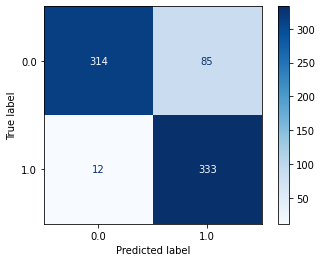

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(kn_n,x_test,y_test, cmap='Blues') # Plota a matriz de confusão do modelo.

##Árvore de decisão

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

avd = DecisionTreeClassifier(criterion='entropy', random_state=42) # Guardamos a função do modelo com o parâmetro previamente escolhido na variável.
avd.fit(x_train, y_train) # Treina o modelo.

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
y_pred_avd = avd.predict(x_test) # Guarda a predição do teste na variável.
y_pred_avd

array([0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 0.

###Metricas

Acuracia

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_avd) # Mostra a acurácia do modelo.

0.9395161290322581

Precisão

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_avd) # Mostra a precisão do modelo.

0.923728813559322

Recall

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_avd) # Mostra a revocação do modelo.

0.9478260869565217

###Matriz de confusão

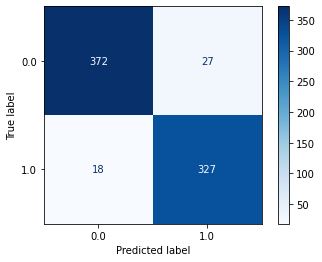

In [ ]:
plot_confusion_matrix(avd,x_test,y_test, cmap='Blues') # Plota a matriz de confusão do modelo.

##SVM

In [ ]:
from sklearn import svm
clf = svm.SVC() # Guardamos a função do modelo com o parâmetro previamente escolhido na variável.
clf.fit(x_train, y_train) # Treina o modelo.
clf

SVC()

In [ ]:
y_pred_clf =clf.predict(x_test) # Guarda a predição do teste na variável.

In [ ]:
y_pred_clf

array([1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0.

### Metricas

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_clf) # Mostra a acurácia do modelo.

0.7029569892473119

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_clf) # Mostra a precisão do modelo.

0.9920634920634921

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_clf) # Mostra a revocação do modelo.

0.36231884057971014

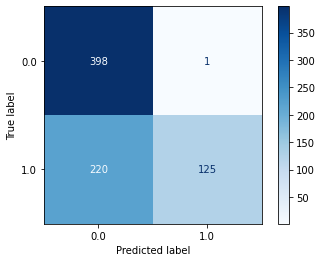

In [ ]:
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(clf,x_test,y_test, cmap='Blues') # Plota a matriz de confusão do modelo.

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

rdf = RandomForestClassifier() # Guardamos a função do modelo com o parâmetro previamente escolhido na variável.
rdf.fit(x_train, y_train) # Treina o modelo.


RandomForestClassifier()

In [ ]:
y_pred_rdf = rdf.predict(x_test) # Guarda a predição do teste na variável.

###Metricas

Acuracia

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_rdf) # Mostra a acurácia do modelo.

0.9758064516129032

Precisão

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_rdf) # Mostra a precisão do modelo.

0.9794721407624634

Recall

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_rdf) # Mostra a revocação do modelo.

0.9681159420289855

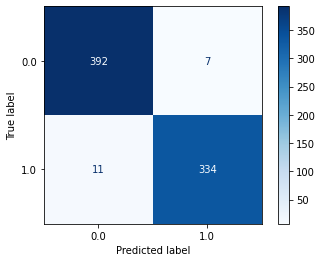

In [ ]:
plot_confusion_matrix(rdf,x_test,y_test, cmap='Blues') # Plota a matriz de confusão do modelo.

##Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nbs = GaussianNB() # Guardamos a função do modelo com o parâmetro previamente escolhido na variável.
nbs.fit(x_train, y_train) # Treina o modelo.


GaussianNB()

In [ ]:
y_pred_nbs = rdf.predict(x_test) # Guarda a predição do teste na variável.

###Metricas

Acuracia

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_nbs) # Mostra a acurácia do modelo.

0.9758064516129032

Precisão

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_nbs) # Mostra a precisão do modelo.

0.9794721407624634

Recall

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_nbs) # Mostra a revocação do modelo.

0.9681159420289855

###Matriz de confusão

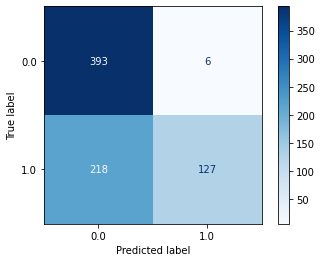

In [ ]:
plot_confusion_matrix(nbs,x_test,y_test, cmap='Blues') # Plota a matriz de confusão do modelo.

##Regressão logistica

In [ ]:
from sklearn.linear_model import LogisticRegression
rgl = LogisticRegression().fit(x_train, y_train) # Guardamos a função do modelo com o parâmetro previamente escolhido na variável.

In [ ]:
y_pred_rgl = rgl.predict(x_test) # Guarda a predição do teste na variável.

###Metricas

Acuracia

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_rgl) # Mostra a acurácia do modelo.

0.7002688172043011

Precisão

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_rgl) # Mostra a precisão do modelo.

0.9621212121212122

Recall

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_rgl) # Mostra a revocação do modelo.

0.3681159420289855

###Matriz de confusão

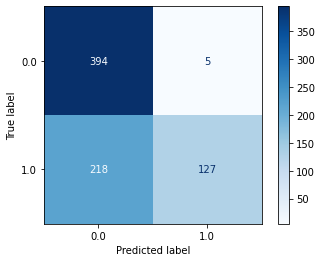

In [ ]:
plot_confusion_matrix(rgl,x_test,y_test, cmap='Blues') # Plota a matriz de confusão do modelo.

In [ ]:
target_corr = matriz_corr.data.ind_atrito
df_corr = target_corr.abs().sort_values(ascending=False).to_frame().style.background_gradient(cmap='coolwarm')
df_corr

NameError: ignored

#Hiperparâmetros

#Árvore de decisão

##Árvore de Decisão parâmetro 1 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

avd = DecisionTreeClassifier(criterion='entropy', random_state=42) # Guardamos a função do modelo com o parâmetro previamente escolhido na variável.
avd.fit(x_train, y_train) # Treina o modelo.

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
y_pred_avd = avd.predict(x_test) # Guarda a predição do teste na variável.
y_pred_avd

array([0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 0.

###Métricas 

In [ ]:
#Importando bibliotecas necessárias
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix

Acurácia

In [ ]:
accuracy_score(y_test, y_pred_avd) # Mostra a acurácia do modelo.

0.9395161290322581

Precisão

In [ ]:
precision_score(y_test, y_pred_avd) # Mostra a precisão do modelo.

0.923728813559322

Recall

In [ ]:
recall_score(y_test, y_pred_avd) # Mostra a revocação do modelo.

0.9478260869565217

Matriz de Confusão

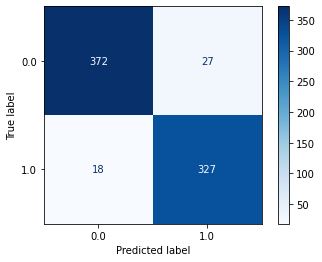

In [ ]:
plot_confusion_matrix(avd,x_test,y_test, cmap='Blues') # Plota a matriz de confusão do modelo.

##Árvore de Decisão parâmetro 2

In [ ]:
avd = DecisionTreeClassifier(criterion='gini', random_state=42) # Guardamos a função do modelo com o parâmetro previamente escolhido na variável.
avd.fit(x_train, y_train)  # Treina o modelo.

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_avd = avd.predict(x_test) # Guarda a predição do teste na variável.
y_pred_avd

array([1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 0.

###Métricas

Acurácia

In [ ]:
accuracy_score(y_test, y_pred_avd) # Mostra a acurácia do modelo.

0.9502688172043011

Precisão

In [ ]:
precision_score(y_test, y_pred_avd) # Mostra a precisão do modelo.

0.9350282485875706

Recall

In [ ]:
recall_score(y_test, y_pred_avd) # Mostra a revocação do modelo.

0.9594202898550724

Matriz de Confusão

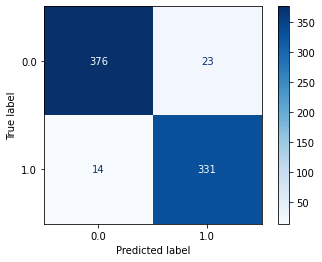

In [ ]:
plot_confusion_matrix(avd,x_test,y_test, cmap='Blues') # Plota a matriz de confusão do modelo.

##Árvore de Decisão parâmetro 3

In [ ]:
avd = DecisionTreeClassifier(criterion='entropy', max_features='auto', random_state=42) # Guardamos a função do modelo com o parâmetro previamente escolhido na variável.
avd.fit(x_train, y_train) # Treina o modelo.

DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=42)

In [ ]:
y_pred_avd = avd.predict(x_test) # Guarda a predição do teste na variável.
y_pred_avd

array([0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 0.

###Métricas

Acurácia

In [ ]:
accuracy_score(y_test, y_pred_avd) # Mostra a acurácia do modelo.

0.8951612903225806

Precisão 

In [ ]:
precision_score(y_test, y_pred_avd) # Mostra a precisão do modelo.

0.871866295264624

Recall

In [ ]:
recall_score(y_test, y_pred_avd) # Mostra a revocação do modelo.

0.9072463768115943

Matriz de Confusão

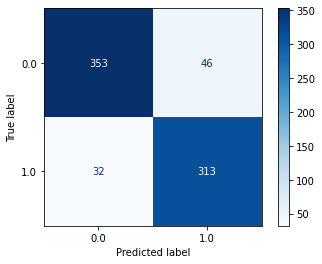

In [ ]:
plot_confusion_matrix(avd,x_test,y_test, cmap='Blues') # Plota a matriz de confusão do modelo.

##Árvore de Decisão parâmetro 4

In [ ]:
avd = DecisionTreeClassifier(criterion='entropy',max_features='log2', random_state=42) # Guardamos a função do modelo com o parâmetro previamente escolhido na variável.
avd.fit(x_train, y_train) # Treina o modelo.

DecisionTreeClassifier(criterion='entropy', max_features='log2',
                       random_state=42)

In [ ]:
y_pred_avd = avd.predict(x_test) # Guarda a predição do teste na variável.
y_pred_avd

array([0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 0.

###Métricas

Acurácia

In [ ]:
accuracy_score(y_test, y_pred_avd) # Mostra a acurácia do modelo.

0.8951612903225806

Precisão

In [ ]:
precision_score(y_test, y_pred_avd) # Mostra a precisão do modelo.

0.871866295264624

Recall

In [ ]:
recall_score(y_test, y_pred_avd) # Mostra a revocação do modelo.

0.9072463768115943

Matriz de Confusão

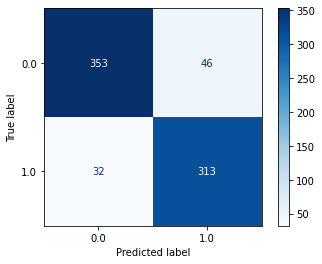

In [ ]:
plot_confusion_matrix(avd,x_test,y_test, cmap='Blues') # Plota a matriz de confusão do modelo.

##Árvore de Decisão parâmetro 5

In [ ]:
avd = DecisionTreeClassifier(criterion='entropy',max_features='sqrt', random_state=42) # Guardamos a função do modelo com o parâmetro previamente escolhido na variável.
avd.fit(x_train, y_train) # Treina o modelo.

DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       random_state=42)

In [ ]:
y_pred_avd = avd.predict(x_test) # Guarda a predição do teste na variável.
y_pred_avd

array([0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 0.

###Métricas

Precisão

In [ ]:
accuracy_score(y_test, y_pred_avd)  # Mostra a acurácia do modelo.

0.8951612903225806

Precisão

In [ ]:
precision_score(y_test, y_pred_avd) # Mostra a precisão do modelo.

0.871866295264624

Recall

In [ ]:
recall_score(y_test, y_pred_avd) # Mostra a revocação do modelo.

0.9072463768115943

Matriz de Confusão

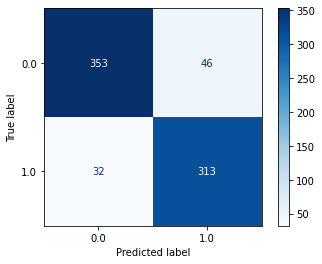

In [ ]:
plot_confusion_matrix(avd,x_test,y_test, cmap='Blues') # Plota a matriz de confusão do modelo.

#KNN

##KNN parâmetro 1

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn_n = KNeighborsClassifier(n_neighbors=10, 
                            weights='uniform') # Guardamos a função do modelo com o parâmetro previamente escolhido na variável.
kn_n.fit(x_train, y_train) #Treina o modelo.

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_prev_knn = kn_n.predict(x_test) # Guarda a predição do teste na variável.
y_prev_knn

array([1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 0.

###Métricas

Acurácia

In [ ]:
accuracy_score(y_test, y_prev_knn) # Mostra a acurácia do modelo.

0.8373655913978495

Precisão 

In [ ]:
precision_score(y_test, y_prev_knn) # Mostra a precisão do modelo.

0.7718446601941747











Recall

In [ ]:
recall_score(y_test, y_prev_knn) # Mostra a revocação do modelo.

0.9217391304347826

Matriz de Confusão

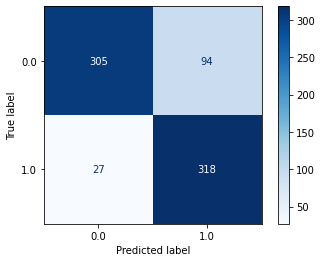

In [ ]:
plot_confusion_matrix(kn_n,x_test,y_test, cmap='Blues') # Plota a matriz de confusão do modelo.

##KNN parâmetro 2

In [ ]:
kn_n = KNeighborsClassifier(n_neighbors=10,
                            weights='distance') # Guardamos a função do modelo com o parâmetro previamente escolhido na variável.
kn_n.fit(x_train, y_train) # Treina o modelo.

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [ ]:
y_prev_knn = kn_n.predict(x_test) # Guarda a predição do teste na variável.
y_prev_knn

array([1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 0.

### Métricas

Acurácia

In [ ]:
accuracy_score(y_test, y_prev_knn) # Mostra a acurácia do modelo.

0.853494623655914

Precisão 

In [ ]:
precision_score(y_test, y_prev_knn) # Mostra a precisão do modelo.

0.7769953051643192

Recall

In [ ]:
recall_score(y_test, y_prev_knn) # Mostra a revocação do modelo.

0.9594202898550724

Matriz de Confusão

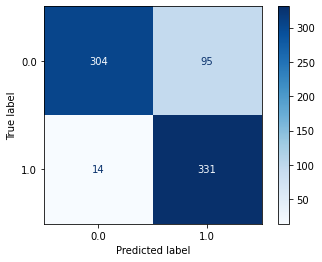

In [ ]:
plot_confusion_matrix(kn_n,x_test,y_test, cmap='Blues') # Plota a matriz de confusão do modelo.

##KNN parâmetro 3

In [ ]:
kn_n = KNeighborsClassifier(leaf_size=30,
                            algorithm='ball_tree') # Guardamos a função do modelo com o parâmetro previamente escolhido na variável.
kn_n.fit(x_train, y_train) # Treina o modelo.

KNeighborsClassifier(algorithm='ball_tree')

In [ ]:
y_prev_knn = kn_n.predict(x_test) # Guarda a predição do teste na variável.
y_prev_knn

array([1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 0.

###Métricas

Acurácia

In [ ]:
accuracy_score(y_test, y_prev_knn) # Mostra a acurácia do modelo.

0.8629032258064516

Precisão

In [ ]:
precision_score(y_test, y_prev_knn) # Mostra a precisão do modelo.

0.7927710843373494

Recall

In [ ]:
recall_score(y_test, y_prev_knn) # Mostra a revocação do modelo.

0.9536231884057971

Matriz de Confusão

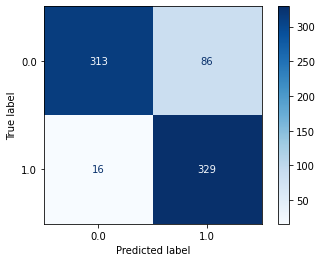

In [ ]:
plot_confusion_matrix(kn_n,x_test,y_test, cmap='Blues') # Plota a matriz de confusão do modelo.

##KNN parametro 4

In [ ]:
kn_n = KNeighborsClassifier(leaf_size=30,
                            algorithm='kd_tree') # Guardamos a função do modelo com o parâmetro previamente escolhido na variável.
kn_n.fit(x_train, y_train) # Treina o modelo.

KNeighborsClassifier(algorithm='kd_tree')

In [ ]:
y_prev_knn = kn_n.predict(x_test) # Guarda a predição do teste na variável.
y_prev_knn

array([1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 0.

###Métricas

Acurácia

In [ ]:
accuracy_score(y_test, y_prev_knn) # Mostra a acurácia do modelo.

0.8629032258064516

Precisão

In [ ]:
precision_score(y_test, y_prev_knn) # Mostra a precisão do modelo.

0.7927710843373494

Recall

In [ ]:
recall_score(y_test, y_prev_knn)# Mostra a revocação do modelo.

0.9536231884057971

Matriz de Confusão

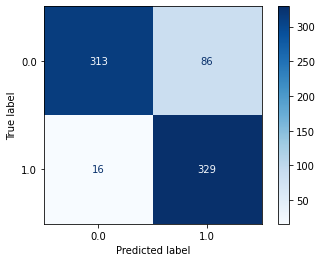

In [ ]:
plot_confusion_matrix(kn_n,x_test,y_test, cmap='Blues') # Plota a matriz de confusão do modelo.

##KNN parâmetro 5


In [ ]:
kn_n = KNeighborsClassifier(leaf_size=30,
                            algorithm='brute') # Guardamos a função do modelo com o parâmetro previamente escolhido na variável.
kn_n.fit(x_train, y_train) # Treina o modelo.

KNeighborsClassifier(algorithm='brute')

In [ ]:
y_prev_knn = kn_n.predict(x_test) # Guarda a predição do teste na variável.
y_prev_knn

array([1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 0.

###Métricas

Acurácia

In [ ]:
accuracy_score(y_test, y_prev_knn) # Mostra a acurácia do modelo.

0.8629032258064516

Precisão

In [ ]:
precision_score(y_test, y_prev_knn) # Mostra a precisão do modelo.

0.7927710843373494

Recall

In [ ]:
recall_score(y_test, y_prev_knn) # Mostra a revocação do modelo.

#Random Forest

##Random Forest PARAMETRO 1

In [ ]:
avd = RandomForestClassifier(criterion='entropy',max_features='sqrt', random_state=42) # Guardamos a função do modelo com o parâmetro previamente escolhido na variável.
avd.fit(x_train, y_train) #Treina o modelo.

RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       random_state=42)

In [ ]:
y_pred_avd = avd.predict(x_test) # Guarda a predição do teste na variável.
y_pred_avd

array([1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 0.

###Metricas

In [ ]:
accuracy_score(y_test, y_pred_avd) # Mostra a acurácia do modelo.

0.9704301075268817

In [ ]:
precision_score(y_test, y_pred_avd) # Mostra a precisão do modelo.

0.9681159420289855

In [ ]:
recall_score(y_test, y_pred_avd)  # Mostra a revocação do modelo.

0.9681159420289855

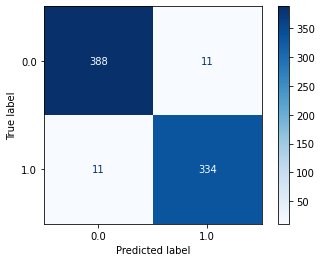

In [ ]:
plot_confusion_matrix(avd,x_test,y_test, cmap='Blues') # Plota a matriz de confusão do modelo.

##Random Forest PARAMETRO 2

In [ ]:
avd = RandomForestClassifier(criterion='gini', random_state=42) # Guardamos a função do modelo com o parâmetro previamente escolhido na variável.
avd.fit(x_train, y_train) # Treina o modelo.

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_avd = avd.predict(x_test) # Guarda a predição do teste na variável.
y_pred_avd

array([1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 0.

###Metricas

In [ ]:
accuracy_score(y_test, y_pred_avd) # Mostra a acurácia do modelo.

0.9758064516129032

In [ ]:
precision_score(y_test, y_pred_avd) # Mostra a precisão do modelo.

0.9823008849557522

In [ ]:
recall_score(y_test, y_pred_avd) # Mostra a revocação do modelo.

0.9652173913043478

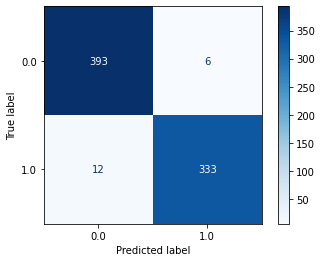

In [ ]:
plot_confusion_matrix(avd,x_test,y_test, cmap='Blues') # Plota a matriz de confusão do modelo.

In [ ]:
rdf = RandomForestClassifier()
rdf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_rdf = rdf.predict(x_test)

##Random Forest PARÂMETRO 3

In [ ]:
avd = RandomForestClassifier(criterion='entropy', max_features='auto', random_state=42) # Guardamos a função do modelo com o parâmetro previamente escolhido na variável.
avd.fit(x_train, y_train) # Treina o modelo.

RandomForestClassifier(criterion='entropy', random_state=42)

In [ ]:
y_pred_avd = avd.predict(x_test) # Guarda a predição do teste na variável.
y_pred_avd

array([1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 0.

###Metricas

In [ ]:
accuracy_score(y_test, y_pred_avd) # Mostra a acurácia do modelo.

0.9704301075268817

In [ ]:
precision_score(y_test, y_pred_avd) # Mostra a precisão do modelo.

0.9681159420289855

In [ ]:
recall_score(y_test, y_pred_avd) # Mostra a revocação do modelo.

0.9681159420289855

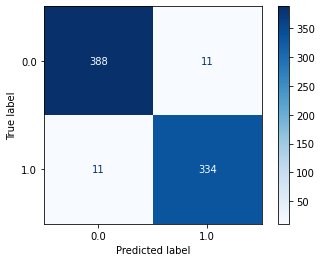

In [ ]:
plot_confusion_matrix(avd,x_test,y_test, cmap='Blues') # Plota a matriz de confusão do modelo.

In [ ]:
rdf = RandomForestClassifier()
rdf.fit(x_train, y_train)


RandomForestClassifier()

In [ ]:
y_pred_rdf = rdf.predict(x_test)

##Random Forest PARÂMETRO 4

In [ ]:
avd = RandomForestClassifier(criterion='entropy', max_features='sqrt', random_state=42) # Guardamos a função do modelo com o parâmetro previamente escolhido na variável.
avd.fit(x_train, y_train) # Treina o modelo.

RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       random_state=42)

In [ ]:
y_pred_avd = avd.predict(x_test) # Guarda a predição do teste na variável.
y_pred_avd

array([1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 0.

###Metricas

In [ ]:
accuracy_score(y_test, y_pred_avd) # Mostra a acurácia do modelo.

0.9704301075268817

In [ ]:
precision_score(y_test, y_pred_avd) # Mostra a precisão do modelo.

0.9681159420289855

In [ ]:
recall_score(y_test, y_pred_avd) # Mostra a revocação do modelo.

0.9681159420289855

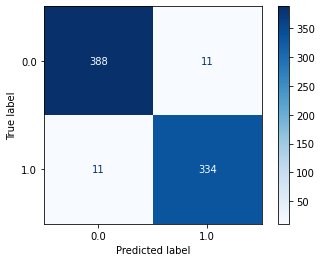

In [ ]:
plot_confusion_matrix(avd,x_test,y_test, cmap='Blues') # Plota a matriz de confusão do modelo.

In [ ]:
rdf = RandomForestClassifier()
rdf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_rdf = rdf.predict(x_test)

##Random Forest PARÂMETRO 5

In [ ]:
avd = RandomForestClassifier(criterion='entropy', max_features='log2', random_state=42) # Guardamos a função do modelo com o parâmetro previamente escolhido na variável.
avd.fit(x_train, y_train) # Treina o modelo.

RandomForestClassifier(criterion='entropy', max_features='log2',
                       random_state=42)

In [ ]:
y_pred_avd = avd.predict(x_test) # Guarda a predição do teste na variável.
y_pred_avd

array([1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 0.

###Metricas

In [ ]:
accuracy_score(y_test, y_pred_avd) # Mostra a acurácia do modelo.

0.9704301075268817

In [ ]:
precision_score(y_test, y_pred_avd) # Mostra a precisão do modelo.

0.9681159420289855

In [ ]:
recall_score(y_test, y_pred_avd) # Mostra a revocação do modelo.

0.9681159420289855

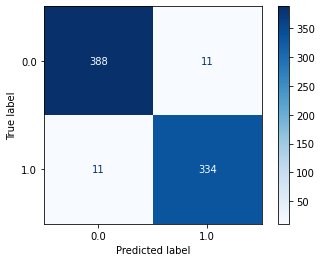

In [ ]:
plot_confusion_matrix(avd,x_test,y_test, cmap='Blues') # Plota a matriz de confusão do modelo.

In [ ]:
rdf = RandomForestClassifier()
rdf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_rdf = rdf.predict(x_test)

#Grid search e randomize search

##KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

###GridSearch

In [ ]:
parametros = {'n_neighbors': [3, 5, 7, 9, 13],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size': [15, 30]}


grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid=parametros) # Guardamos a função do gridsearch com o parâmetro previamente escolhido na variável.
grid_search.fit(x_train, y_train.squeeze()) # Treina o modelo.

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [15, 30], 'n_neighbors': [3, 5, 7, 9, 13],
                         'weights': ['uniform', 'distance']})

In [ ]:
print(grid_search.best_score_)
print(grid_search.best_params_)
# Mostra os melhores parâmetros para o modelo.

0.8654143677673088
{'algorithm': 'auto', 'leaf_size': 15, 'n_neighbors': 3, 'weights': 'distance'}


In [ ]:
knn_best = grid_search.best_estimator_
knn_best

KNeighborsClassifier(leaf_size=15, n_neighbors=3, weights='distance')

In [ ]:
from sklearn.metrics import f1_score
y_pred = knn_best.predict(x_test)
# Mostra as métricas do modelo
print('Acc treino: ', knn_best.score(x_train, y_train ))
print('Acc teste: ', knn_best.score(x_test, y_test.squeeze() ))
print( 'Revocação: ', recall_score( y_test, y_pred ))
print( 'Precisão: ', precision_score( y_test, y_pred ))
print( 'F1_score: ', f1_score( y_test, y_pred ))

Acc treino:  1.0
Acc teste:  0.8790322580645161
Revocação:  0.9768115942028985
Precisão:  0.8042959427207638
F1_score:  0.8821989528795812


###RandomizedSearchCV

In [ ]:
parametros = {'n_neighbors': [3, 5, 7, 9, 13, 15, 17, 21, 23, 25, 27, 29, 31, 33],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size': [7, 15, 30, 45, 60, 75]}
random_search = RandomizedSearchCV(estimator = KNeighborsClassifier(),
                                   param_distributions=parametros) # Guardamos a função do randomsearch com o parâmetro previamente escolhido na variável.
random_search.fit(x_train, y_train.squeeze())

RandomizedSearchCV(estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [7, 15, 30, 45, 60, 75],
                                        'n_neighbors': [3, 5, 7, 9, 13, 15, 17,
                                                        21, 23, 25, 27, 29, 31,
                                                        33],
                                        'weights': ['uniform', 'distance']})

In [ ]:
print(random_search.best_score_)
print(random_search.best_params_)
# Mostra os melhores parâmetros para o modelo.

0.8556551509492685
{'weights': 'distance', 'n_neighbors': 5, 'leaf_size': 7, 'algorithm': 'kd_tree'}


In [ ]:
knn_best = random_search.best_estimator_
knn_best

KNeighborsClassifier(algorithm='kd_tree', leaf_size=7, weights='distance')

In [ ]:
y_pred = knn_best.predict(x_test)
# Mostra as métricas do modelo
print('Acc treino: ', knn_best.score(x_train, y_train ))
print('Acc teste: ', knn_best.score(x_test, y_test.squeeze() ))
print( 'Revocação: ', recall_score( y_test, y_pred ))
print( 'Precisão: ', precision_score( y_test, y_pred ))
print( 'F1_score: ', f1_score( y_test, y_pred ))

Acc treino:  1.0
Acc teste:  0.8763440860215054
Revocação:  0.9681159420289855
Precisão:  0.8048192771084337
F1_score:  0.8789473684210527


##Árvore de Decisão

###GridSearch

In [ ]:
# Definir o espaço possível dos hiperparametros a serem testados no modelo
parametros = {'criterion': ['gini', 'entropy', 'log_loss'],
              'splitter': ['best', 'random']}


grid_search = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid=parametros) # Guardamos a função do gridsearch com o parâmetro previamente escolhido na variável.
grid_search.fit(x_train, y_train.squeeze())

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'splitter': ['best', 'random']})

In [ ]:
# Mostra os melhores parâmetros para o modelo.
print(grid_search.best_score_)

print(grid_search.best_params_)

0.940109215403333
{'criterion': 'entropy', 'splitter': 'best'}


In [ ]:
avd_best = grid_search.best_estimator_
avd_best

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_pred = avd_best.predict(x_test)
# Mostra as métricas do modelo
print('Acc treino: ', avd_best.score(x_train, y_train ))
print('Acc teste: ', avd_best.score(x_test, y_test.squeeze() ))
print( 'Revocação: ', recall_score( y_test, y_pred ))
print( 'Precisão: ', precision_score( y_test, y_pred ))
print( 'F1_score: ', f1_score( y_test, y_pred ))

Acc treino:  1.0
Acc teste:  0.9422043010752689
Revocação:  0.9507246376811594
Precisão:  0.9265536723163842
F1_score:  0.9384835479256081


###RandomizedSearchCV

In [ ]:
# Definir o espaço possível dos hiperparametros a serem testados no modelo
parametros = {'criterion': ['gini', 'entropy', 'log_loss'],
              'splitter': ['best', 'random']}


random_search = RandomizedSearchCV(estimator = DecisionTreeClassifier(),
                                   param_distributions=parametros) # Guardamos a função do randomsearch com o parâmetro previamente escolhido na variável.
random_search.fit(x_train, y_train.squeeze())

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'splitter': ['best', 'random']})

In [ ]:
# Mostra os melhores parâmetros para o modelo.
print(random_search.best_score_)
print(random_search.best_params_)

0.9407820501938149
{'splitter': 'best', 'criterion': 'entropy'}


In [ ]:
avd_best = random_search.best_estimator_
avd_best

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_pred = avd_best.predict(x_test)
# Mostra as métricas do modelo
print('Acc treino: ', avd_best.score(x_train, y_train ))
print('Acc teste: ', avd_best.score(x_test, y_test.squeeze() ))
print( 'Revocação: ', recall_score( y_test, y_pred ))
print( 'Precisão: ', precision_score( y_test, y_pred ))
print( 'F1_score: ', f1_score( y_test, y_pred ))

Acc treino:  1.0
Acc teste:  0.9368279569892473
Revocação:  0.9478260869565217
Precisão:  0.9185393258426966
F1_score:  0.9329529243937231


##Random Forest

###GridSearch

In [ ]:
# Definir o espaço possível dos hiperparametros a serem testados no modelo
parametros = {'n_estimators': [10, 20, 40],
              'criterion': ['gini', 'entropy', 'log_loss'],
               'max_depth': [10,20,30]}



grid_search = GridSearchCV(estimator = RandomForestClassifier(), param_grid=parametros) # Guardamos a função do gridsearch com o parâmetro previamente escolhido na variável.
grid_search.fit(x_train, y_train.squeeze())

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 20, 30],
                         'n_estimators': [10, 20, 40]})

In [ ]:
# Mostra os melhores parâmetros para o modelo.
print(grid_search.best_score_)
print(grid_search.best_params_)

0.9697224344283167
{'criterion': 'entropy', 'max_depth': 30, 'n_estimators': 40}


In [ ]:
knn_best = grid_search.best_estimator_
knn_best

RandomForestClassifier(criterion='entropy', max_depth=30, n_estimators=40)

In [ ]:
y_pred = knn_best.predict(x_test)
# Mostra as métricas do modelo
print('Acc treino: ', knn_best.score(x_train, y_train ))
print('Acc teste: ', knn_best.score(x_test, y_test.squeeze() ))
print( 'Revocação: ', recall_score( y_test, y_pred ))
print( 'Precisão: ', precision_score( y_test, y_pred ))
print( 'F1_score: ', f1_score( y_test, y_pred ))

Acc treino:  1.0
Acc teste:  0.9717741935483871
Revocação:  0.9681159420289855
Precisão:  0.9709302325581395
F1_score:  0.9695210449927432


###RandomSearch

In [ ]:
# Definir o espaço possível dos hiperparametros a serem testados no modelo
parametros = {'n_estimators': [10, 20, 40, 60, 80, 100],
              'criterion': ['gini', 'entropy','log loss'],
              'max_depth': [10,20,30,40,50],}

random_search = RandomizedSearchCV(estimator = RandomForestClassifier(), 
                                  param_distributions=parametros) # Guardamos a função do randomsearch com o parâmetro previamente escolhido na variável.
random_search.fit(x_train, y_train.squeeze())

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log loss'],
                                        'max_depth': [10, 20, 30, 40, 50],
                                        'n_estimators': [10, 20, 40, 60, 80,
                                                         100]})

In [ ]:
# Mostra os melhores parâmetros para o modelo.
print(random_search.best_score_)
print(random_search.best_params_)

0.9676994029935206
{'n_estimators': 60, 'max_depth': 30, 'criterion': 'entropy'}


In [ ]:
rdf_best = random_search.best_estimator_
rdf_best

RandomForestClassifier(criterion='entropy', max_depth=30, n_estimators=60)

In [ ]:
y_pred = rdf_best.predict(x_test)
# Mostra as métricas do modelo
print('Acc treino: ', rdf_best.score(x_train, y_train ))
print('Acc teste: ', rdf_best.score(x_test, y_test.squeeze() ))
print( 'Revocação: ', recall_score( y_test, y_pred ))
print( 'Precisão: ', precision_score( y_test, y_pred ))

Acc treino:  1.0
Acc teste:  0.978494623655914
Revocação:  0.9710144927536232
Precisão:  0.9824046920821115
